In [1]:
import pandas as pd

# Load the cleaned dataset
file_path = 'cleaned_CKD_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


     Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  137.53  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0      1  
1  0.0      1  
2  0.0      1  
3  1.0      1  
4  0.0      1  


In [3]:
from sklearn.preprocessing import StandardScaler

# Remove non-numeric columns if present and scale the data
X = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check scaled data
print(X_scaled[:5])


[[ 0.26337923  0.4214856  -0.01180416 -0.38026942  0.36488968 -0.44673018
  -0.46255585 -0.13879466  0.30810558  1.07970274 -0.2405058   0.53219091
   1.30997921  0.77459667]
 [-1.96549998  0.4214856   2.34902872 -0.38026942  0.36488968 -0.95673657
  -0.61178547 -0.13879466  0.30810558 -0.5135386  -0.95477338 -0.24201987
  -0.76720974  0.77459667]
 [ 0.26337923 -1.4210744   0.77514013  2.50785277  0.36488968  0.03494252
  -0.23871143 -0.13879466  0.30810558 -1.17415086 -0.3595504  -0.24201987
  -0.76720974  0.77459667]
 [-0.47958051 -2.3423544   2.34902872 -0.38026942  0.36488968  0.11994359
   0.50743666 -0.13879466 -2.95000477 -0.55239814 -0.67700265 -1.5218377
   1.30997921  0.77459667]
 [ 0.26337923 -1.4210744   0.77514013 -0.38026942  0.36488968 -0.73006707
  -0.38794104 -0.13879466  0.30810558 -0.39695996 -0.43891346 -0.41582229
  -0.76720974  0.77459667]]


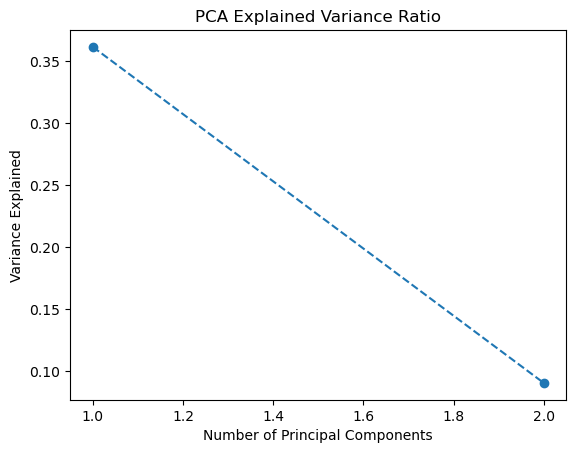

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure()
plt.plot(range(1, 3), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.show()


c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a mem

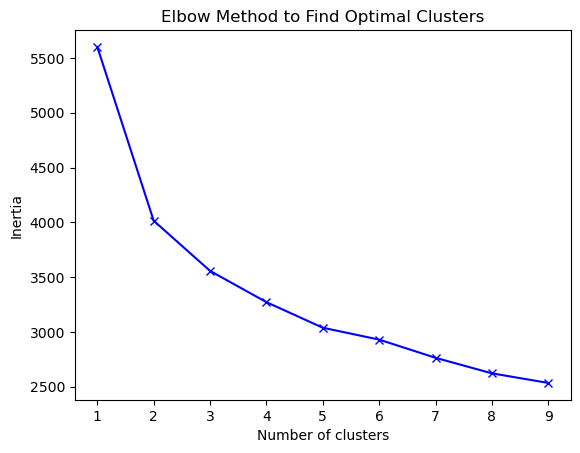

In [5]:
from sklearn.cluster import KMeans
import numpy as np

# Elbow method to find optimal number of clusters
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal Clusters')
plt.show()


In [6]:
# Fit the model with the optimal number of clusters (based on the Elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Display cluster centroids
print(kmeans.cluster_centers_)


[[ 0.52990129 -0.4997944   1.06243725  0.30737872 -0.81813663  1.63943882
   1.73265918 -0.87761731  0.36686276 -1.19962545  0.00267271 -0.44942911
   0.98026668  0.77459667]
 [-0.37457553  0.85141627 -0.77251698 -0.38026942  0.36488968 -0.51000875
  -0.55868459  0.64985106 -0.12375976  0.95607757 -0.26499724  0.76571817
  -0.75696227 -1.29099445]
 [ 0.12193876 -0.51457429  0.26173262  0.20147355 -0.01706334 -0.14322638
  -0.13558738 -0.22560304 -0.02432295 -0.36275525  0.2116642  -0.46280049
   0.27693872  0.77459667]]


c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


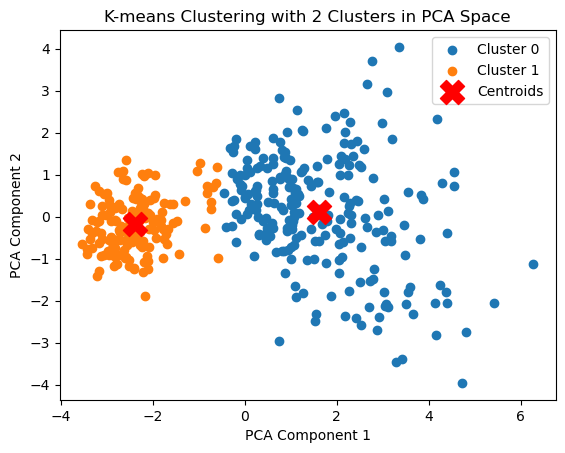

In [13]:
# Perform K-means clustering with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(X_scaled)

# Project the original centroids for 2 clusters into the PCA space
centroids_2_pca = pca.transform(kmeans_2.cluster_centers_)

# Plot the clusters and centroids for 2 clusters in PCA space
plt.figure()
for cluster in range(2):
    plt.scatter(X_pca[clusters_2 == cluster, 0], X_pca[clusters_2 == cluster, 1], label=f'Cluster {cluster}')
    
# Plot the centroids in the PCA-transformed space
plt.scatter(centroids_2_pca[:, 0], centroids_2_pca[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('K-means Clustering with 2 Clusters in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


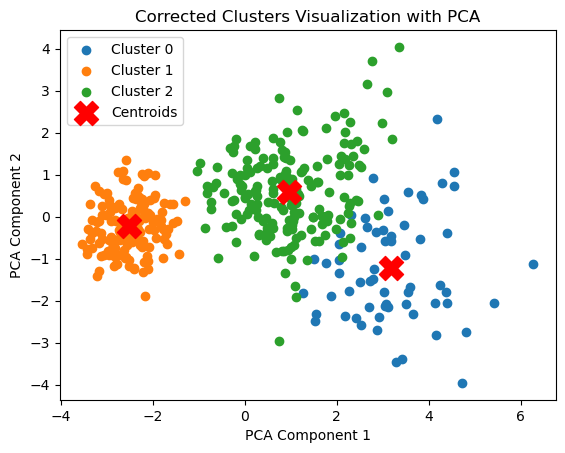

In [10]:
# Calculate the K-means centroids in the original high-dimensional space
centroids_original_space = kmeans.cluster_centers_

# Transform the centroids to the PCA space
centroids_pca = pca.transform(centroids_original_space)

# Plot the clusters with the correctly transformed centroids
plt.figure()
for cluster in range(kmeans.n_clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
    
# Plot the centroids in the PCA-transformed space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Corrected Clusters Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


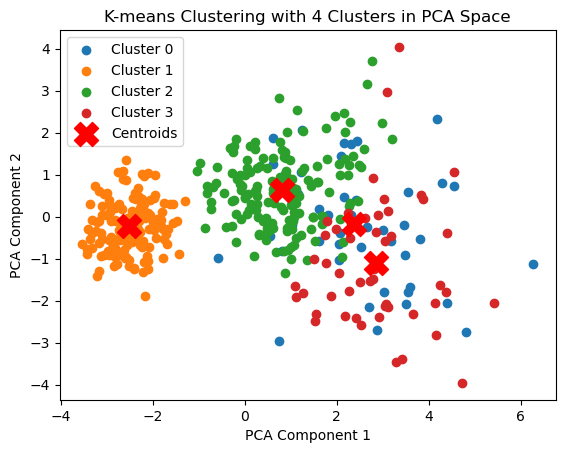

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-means clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(X_scaled)

# Project the original centroids for 4 clusters into the PCA space
centroids_4_pca = pca.transform(kmeans_4.cluster_centers_)

# Plot the clusters and centroids for 4 clusters in PCA space
plt.figure()
for cluster in range(4):
    plt.scatter(X_pca[clusters_4 == cluster, 0], X_pca[clusters_4 == cluster, 1], label=f'Cluster {cluster}')
    
# Plot the centroids in the PCA-transformed space
plt.scatter(centroids_4_pca[:, 0], centroids_4_pca[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('K-means Clustering with 4 Clusters in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a mem

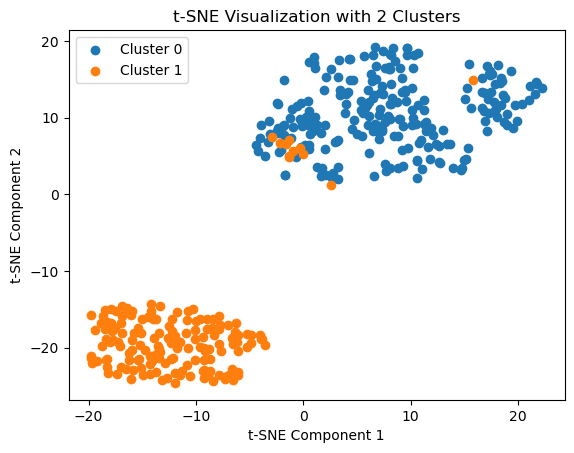

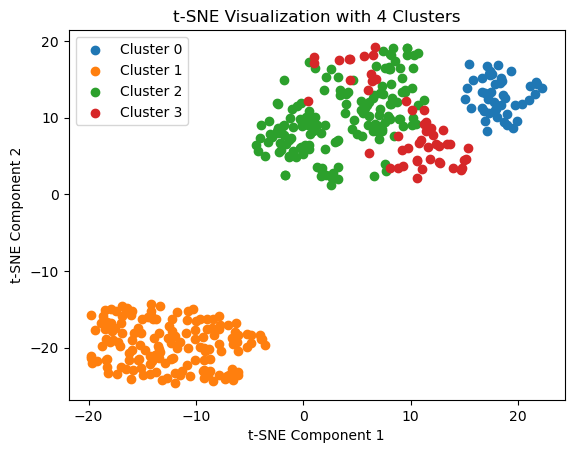

In [16]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define and fit K-means with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(X_scaled)

# Define and fit K-means with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(X_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE results with 2 clusters
plt.figure()
for cluster in range(2):
    plt.scatter(X_tsne[clusters_2 == cluster, 0], X_tsne[clusters_2 == cluster, 1], label=f'Cluster {cluster}')
plt.title('t-SNE Visualization with 2 Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

# Plot t-SNE results with 4 clusters
plt.figure()
for cluster in range(4):
    plt.scatter(X_tsne[clusters_4 == cluster, 0], X_tsne[clusters_4 == cluster, 1], label=f'Cluster {cluster}')
plt.title('t-SNE Visualization with 4 Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


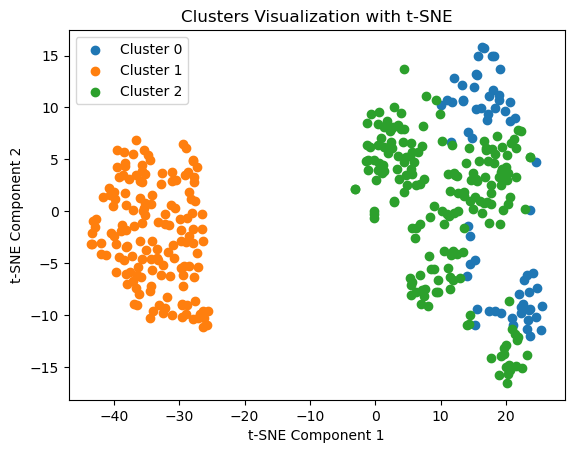

In [11]:
from sklearn.manifold import TSNE

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Scatter plot for t-SNE
plt.figure()
for cluster in range(kmeans.n_clusters):
    plt.scatter(X_tsne[clusters == cluster, 0], X_tsne[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('Clusters Visualization with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 2 clusters: 0.256022153557911


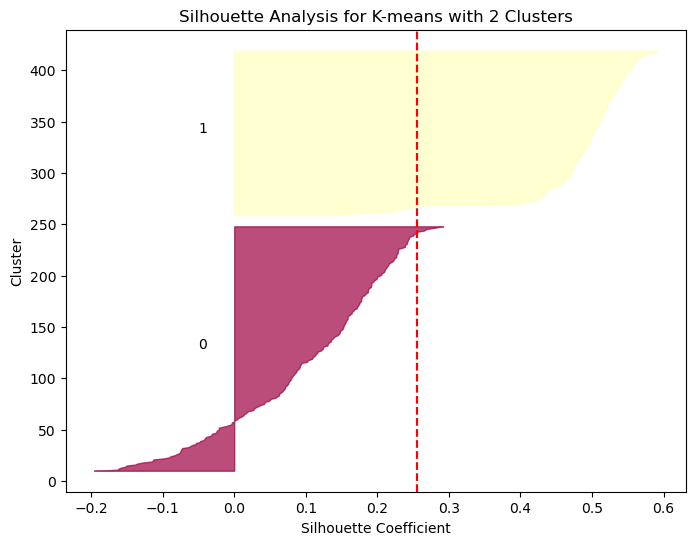

c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 3 clusters: 0.23957646510137512


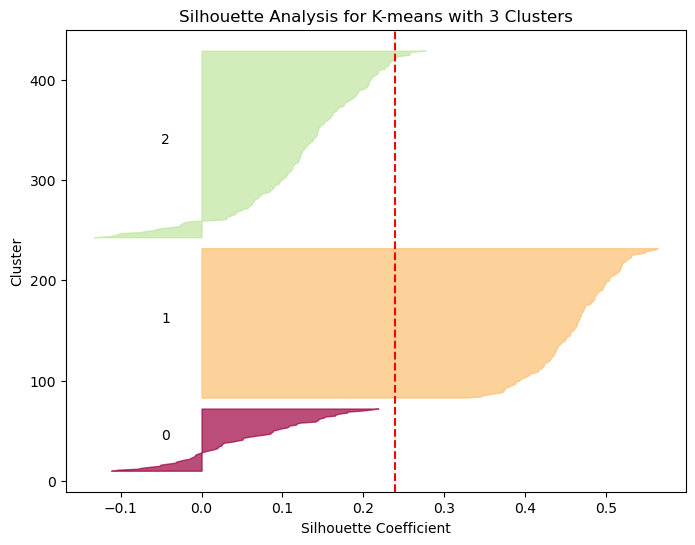

c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 4 clusters: 0.24521398971086406


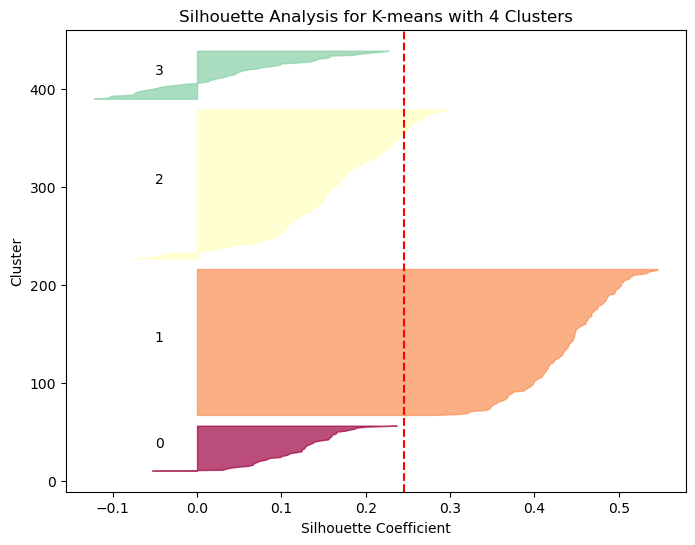

In [18]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Define a function to plot silhouette analysis
def plot_silhouette_analysis(X, n_clusters, cluster_labels):
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    plt.figure(figsize=(8, 6))
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples in cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers in the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.title(f"Silhouette Analysis for K-means with {n_clusters} Clusters")
    plt.show()

# Apply KMeans and silhouette analysis for 2, 3, and 4 clusters
for n_clusters in [2, 3, 4]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    plot_silhouette_analysis(X_scaled, n_clusters, cluster_labels)


c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a mem

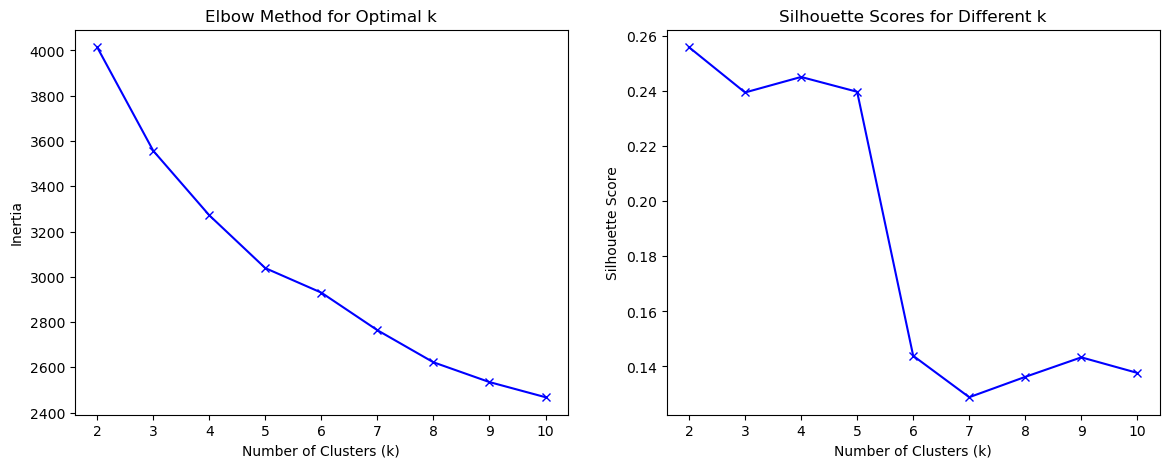

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Test KMeans for k values from 2 to 10
inertia_values = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot the inertia and silhouette scores
plt.figure(figsize=(14, 5))

# Elbow plot (Inertia)
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')

plt.show()


In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Standard Scaling
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)

# MinMax Scaling
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Run KMeans on both scaled datasets and compare silhouette scores for 3 clusters
kmeans_standard = KMeans(n_clusters=3, random_state=42)
labels_standard = kmeans_standard.fit_predict(X_standard_scaled)
silhouette_standard = silhouette_score(X_standard_scaled, labels_standard)

kmeans_minmax = KMeans(n_clusters=3, random_state=42)
labels_minmax = kmeans_minmax.fit_predict(X_minmax_scaled)
silhouette_minmax = silhouette_score(X_minmax_scaled, labels_minmax)

print(f'Silhouette Score with Standard Scaling: {silhouette_standard}')
print(f'Silhouette Score with MinMax Scaling: {silhouette_minmax}')


Silhouette Score with Standard Scaling: 0.23957646510137512
Silhouette Score with MinMax Scaling: 0.44527734106619776


c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a mem

c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a mem

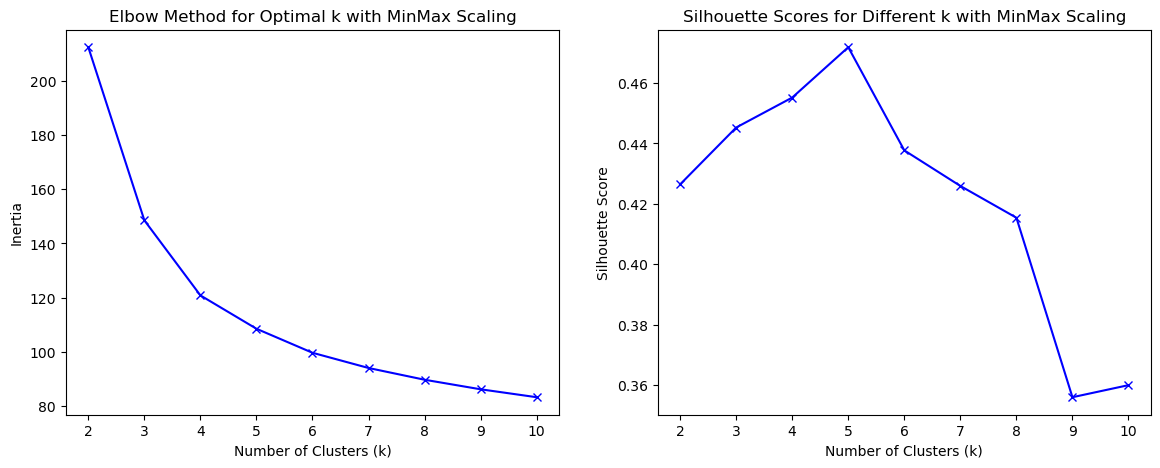

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Test a range of cluster values for MinMax-scaled data
inertia_values = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_minmax_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_minmax_scaled, labels))

# Plot the inertia and silhouette scores for MinMax scaling
plt.figure(figsize=(14, 5))

# Elbow plot (Inertia)
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k with MinMax Scaling')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k with MinMax Scaling')

plt.show()


c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


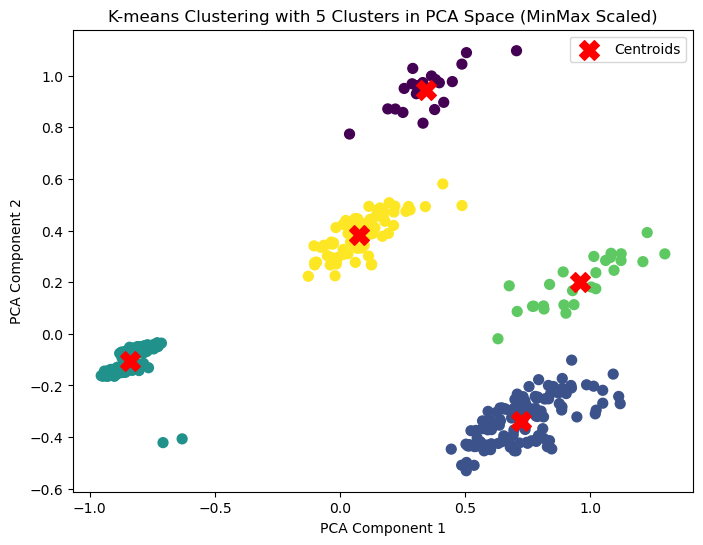

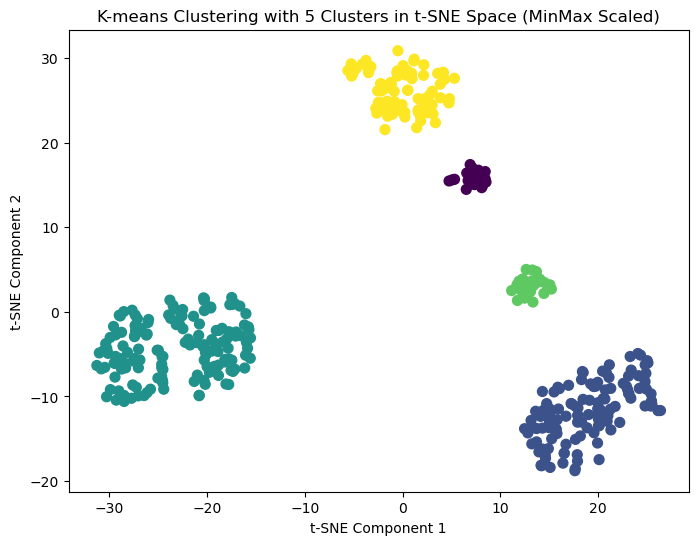

In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the optimal number of clusters based on the previous analysis
optimal_k = 5  # Replace this with the chosen number from your analysis

# Fit KMeans on MinMax-scaled data
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X_minmax_scaled)
centroids = kmeans_optimal.cluster_centers_

# PCA Visualization
pca = PCA(n_components=2)
X_pca_minmax = pca.fit_transform(X_minmax_scaled)
centroids_pca = pca.transform(centroids)  # Transform centroids to PCA space

# Plotting K-means clusters in PCA space with correct centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_minmax[:, 0], X_pca_minmax[:, 1], c=labels_optimal, cmap='viridis', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, label='Centroids', marker='X')
plt.title(f"K-means Clustering with {optimal_k} Clusters in PCA Space (MinMax Scaled)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne_minmax = tsne.fit_transform(X_minmax_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=labels_optimal, cmap='viridis', s=50)
plt.title(f"K-means Clustering with {optimal_k} Clusters in t-SNE Space (MinMax Scaled)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


Silhouette Score for 5 clusters: 0.47185497810820803


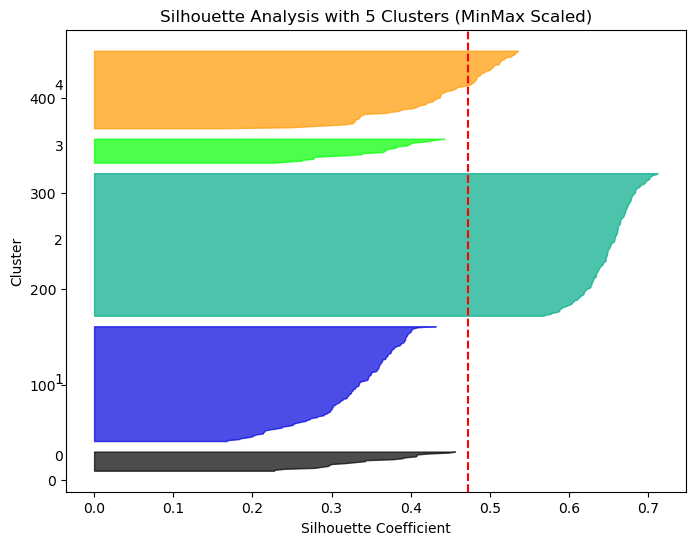

In [26]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def plot_silhouette(X, labels, n_clusters):
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X, labels)
    y_lower = 10
    plt.figure(figsize=(8, 6))

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.title(f"Silhouette Analysis with {n_clusters} Clusters (MinMax Scaled)")
    plt.show()

# Run silhouette analysis for optimal number of clusters
plot_silhouette(X_minmax_scaled, labels_optimal, optimal_k)


In [31]:
import pandas as pd
import numpy as np

# Assuming 'X' is the original dataframe
clustered_data = pd.DataFrame(X_minmax_scaled, columns=X.columns)
clustered_data['Cluster'] = labels_optimal

# Compute mean values for each feature per cluster
cluster_means = clustered_data.groupby('Cluster').mean()

# Display the mean values
print("Mean feature values per cluster:")
print(cluster_means)


Mean feature values per cluster:
               Bp        Sg        Al        Su  Rbc        Bu        Sc  \
Cluster                                                                    
0        0.201465  0.392857  0.428571  0.114286  0.0  0.270981  0.170059   
1        0.231151  0.526860  0.335537  0.148760  1.0  0.331811  0.233188   
2        0.164718  0.866667  0.006667  0.000000  1.0  0.131308  0.037146   
3        0.282840  0.490385  0.492308  0.146154  0.0  0.374331  0.292334   
4        0.209006  0.481707  0.217073  0.090244  1.0  0.207728  0.133253   

              Sod       Pot      Hemo      Wbcc      Rbcc       Htn  Class  
Cluster                                                                     
0        0.531381  0.450290  0.452583  0.276978  0.260952  0.000000    1.0  
1        0.527813  0.490889  0.403096  0.280045  0.225124  1.000000    1.0  
2        0.719700  0.450650  0.769650  0.228855  0.410622  0.004933    0.0  
3        0.475269  0.512664  0.384355  0.241008  

c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


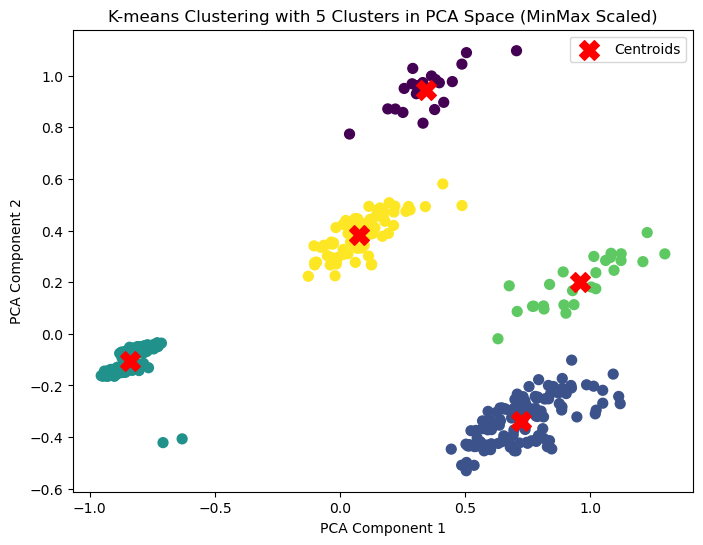

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit KMeans on MinMax-scaled data (make sure optimal_k is set as appropriate)
optimal_k = 5
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X_minmax_scaled)

# Apply PCA to the data
pca = PCA(n_components=2)
X_pca_minmax = pca.fit_transform(X_minmax_scaled)

# Transform centroids with the same PCA transformation
centroids_pca = pca.transform(kmeans_optimal.cluster_centers_)

# Plot PCA visualization with cluster labels and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_minmax[:, 0], X_pca_minmax[:, 1], c=labels_optimal, cmap='viridis', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, label='Centroids', marker='X')
plt.title(f"K-means Clustering with {optimal_k} Clusters in PCA Space (MinMax Scaled)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(X_minmax_scaled, labels_optimal)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

# Davies-Bouldin Index (lower values indicate better clustering)
davies_bouldin = davies_bouldin_score(X_minmax_scaled, labels_optimal)
print(f"Davies-Bouldin Index for {optimal_k} clusters: {davies_bouldin}")


Silhouette Score for 5 clusters: 0.47185497810820803
Davies-Bouldin Index for 5 clusters: 1.0687014184993378


In [40]:
from sklearn.cluster import KMeans

# Increase `n_init` to ensure stability
kmeans_stable = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
labels_stable = kmeans_stable.fit_predict(X_minmax_scaled)

# Compare silhouette score for stability
silhouette_stable = silhouette_score(X_minmax_scaled, labels_stable)
print(f"Silhouette Score with 20 initializations for {optimal_k} clusters: {silhouette_stable}")


Silhouette Score with 20 initializations for 5 clusters: 0.47185497810820803


c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LEGION\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 5 clusters: 0.47185497810820803


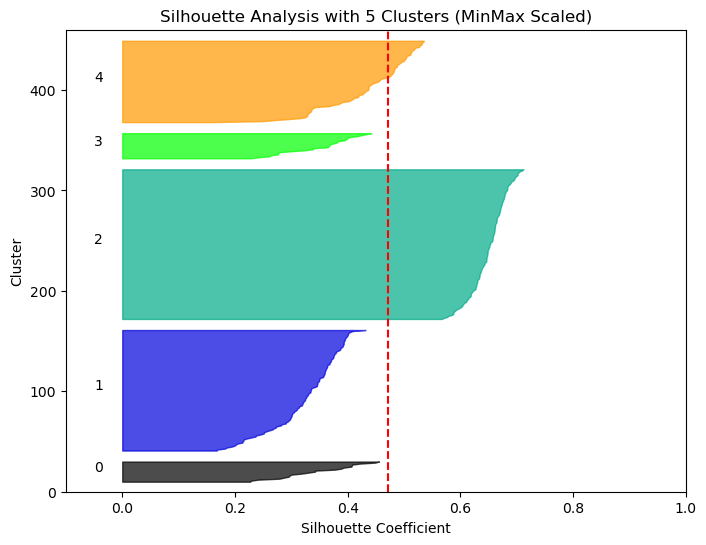

In [42]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Define the number of clusters based on your optimal value
optimal_k = 5  # Adjust this based on your elbow and silhouette analysis

# Fit KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X_minmax_scaled)

# Compute the average silhouette score
silhouette_avg = silhouette_score(X_minmax_scaled, labels_optimal)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_minmax_scaled, labels_optimal)

# Create a silhouette plot
fig, ax = plt.subplots(figsize=(8, 6))

# Set up the silhouette plot layout
y_lower = 10
for i in range(optimal_k):
    # Aggregate silhouette scores for samples in cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[labels_optimal == i]
    ith_cluster_silhouette_values.sort()
    
    # Calculate the cluster height on the plot
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Choose color for each cluster
    color = cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

# Plot the vertical line for the average silhouette score of all values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Add titles and labels
ax.set_title(f"Silhouette Analysis with {optimal_k} Clusters (MinMax Scaled)")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")

# Adjust x-axis and y-axis limits
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_minmax_scaled) + (optimal_k + 1) * 10])

plt.show()
